In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from preprocess.DataIO import build_dict_mimic3, build_dict_mc3, build_dict_ppi, build_dict_syn
import dev.util as util
import pickle

In [3]:
n_trail = 20
num = 10
i = 1
nl = [0, 0.1, 0.2, 0.3, 0.4, 0.5]

In [4]:
data_syn = build_dict_syn(num_node=num, noise=nl[i])

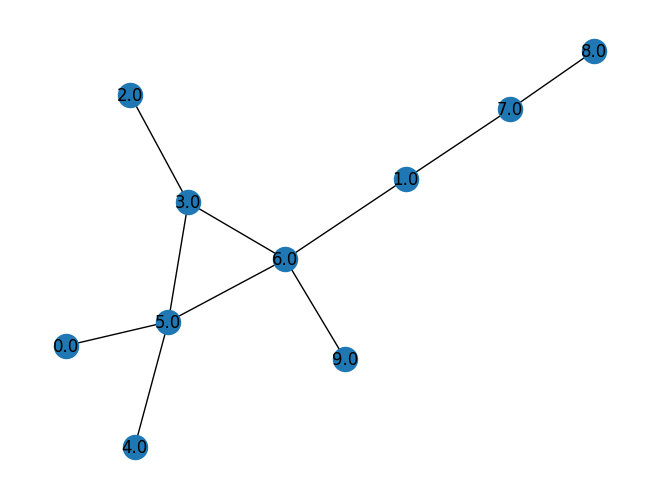

In [5]:
# show src graph

nodes = data_syn['src_index']
edges = data_syn['src_interactions']

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G, with_labels=True)
plt.show()

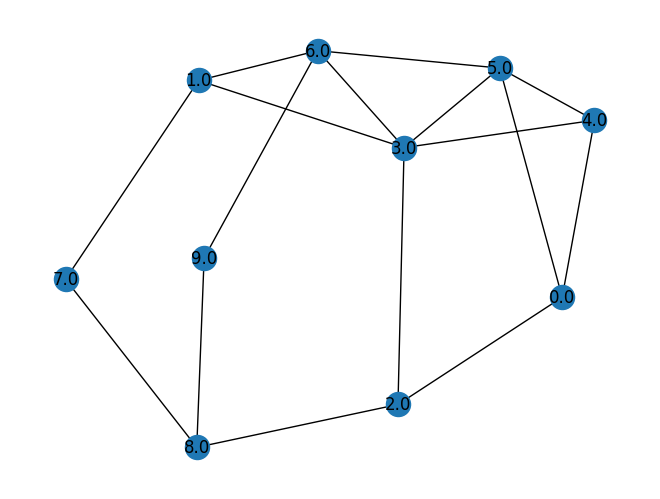

In [6]:
# show tar graph

nodes = data_syn['tar_index']
edges = data_syn['tar_interactions']

G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G, with_labels=True)
plt.show()

In [7]:
data_syn

{'src_index': {0.0: 0,
  1.0: 1,
  2.0: 2,
  3.0: 3,
  4.0: 4,
  5.0: 5,
  6.0: 6,
  7.0: 7,
  8.0: 8,
  9.0: 9},
 'tar_index': {0.0: 0,
  1.0: 1,
  2.0: 2,
  3.0: 3,
  4.0: 4,
  5.0: 5,
  6.0: 6,
  7.0: 7,
  8.0: 8,
  9.0: 9},
 'src_interactions': [[0, np.int32(5)],
  [1, np.int32(6)],
  [2, np.int32(3)],
  [2, np.int32(3)],
  [2, np.int32(3)],
  [2, np.int32(3)],
  [3, np.int32(5)],
  [3, np.int32(5)],
  [3, np.int32(5)],
  [3, np.int32(5)],
  [3, np.int32(5)],
  [3, np.int32(5)],
  [3, np.int32(5)],
  [3, np.int32(5)],
  [3, np.int32(5)],
  [4, np.int32(5)],
  [4, np.int32(5)],
  [4, np.int32(5)],
  [4, np.int32(5)],
  [5, np.int32(6)],
  [5, np.int32(6)],
  [5, np.int32(6)],
  [5, np.int32(6)],
  [5, np.int32(6)],
  [5, np.int32(6)],
  [5, np.int32(6)],
  [5, np.int32(6)],
  [6, np.int32(3)],
  [6, np.int32(3)],
  [6, np.int32(3)],
  [6, np.int32(3)],
  [6, np.int32(3)],
  [6, np.int32(3)],
  [6, np.int32(3)],
  [6, np.int32(3)],
  [6, np.int32(3)],
  [6, np.int32(3)],
  [7, np.int

In [8]:
from model.BAPG import process_interaction_data

results = process_interaction_data(data_syn)

print(results['accuracy'])      # Node matching accuracy
print(results['runtime'])        # Computation time
print(results['coupling_matrix']) # Full coupling matrix

Source graph: 10 nodes
Target graph: 10 nodes
Source edges: 10.0
Target edges: 16.0
Iteration 0: Accuracy = 0.1000
Iteration 50: Accuracy = 0.1000
Iteration 100: Accuracy = 0.1000
Iteration 150: Accuracy = 0.1000
Iteration 200: Accuracy = 0.1000
Iteration 250: Accuracy = 0.1000
Iteration 300: Accuracy = 0.1000
Iteration 350: Accuracy = 0.1000
Iteration 400: Accuracy = 0.1000
Iteration 450: Accuracy = 0.1000
Iteration 500: Accuracy = 0.1000
Iteration 550: Accuracy = 0.1000
Iteration 600: Accuracy = 0.1000
Iteration 650: Accuracy = 0.1000
Iteration 700: Accuracy = 0.1000
Iteration 750: Accuracy = 0.1000
Iteration 800: Accuracy = 0.1000
Iteration 850: Accuracy = 0.1000
Iteration 900: Accuracy = 0.1000
Iteration 950: Accuracy = 0.1000
Iteration 1000: Accuracy = 0.1000
Iteration 1050: Accuracy = 0.1000
Iteration 1100: Accuracy = 0.1000
Iteration 1150: Accuracy = 0.1000
Iteration 1200: Accuracy = 0.1000
Iteration 1250: Accuracy = 0.1000
Iteration 1300: Accuracy = 0.1000
Iteration 1350: Accur

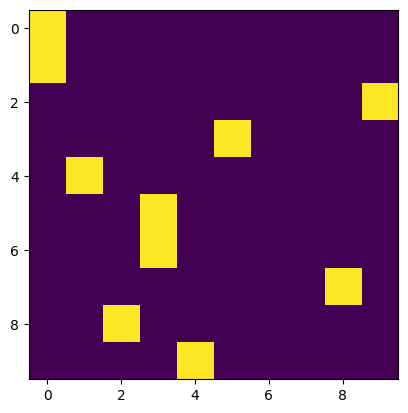

In [9]:
# plot oupling matrix with matplotlib with the highest value being the corresponding node matching
# only show matching from teh source nodes to target nodes
import matplotlib.pyplot as plt

matrix = results['coupling_matrix']
#only keep the max value in each row
for i in range(matrix.shape[0]):
    row = matrix[i]
    max_index = row.argmax()
    new_row = [0] * matrix.shape[1]
    new_row[max_index] = 1
    matrix[i] = new_row

plt.imshow(matrix, interpolation='nearest')
plt.show()

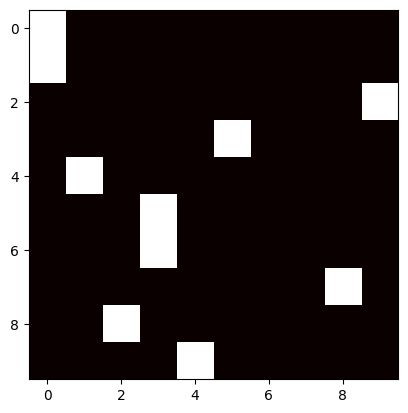

In [10]:
# plot oupling matrix with matplotlib with the highest value being the corresponding node matching
# only show matching from teh source nodes to target nodes

import matplotlib.pyplot as plt
matrix = results['coupling_matrix']
plt.imshow(matrix, cmap='hot', interpolation='nearest')
plt.show()

In [11]:
#  load stats/data/ folder to see the saved experimental results
import pickle

with open('stats_data/matching_results_syn.pickle', 'rb') as f:
    data = pickle.load(f)
data

{'time_GWEMBED': {(25, 0): [3.239685535430908,
   3.201246500015259,
   2.9455015659332275,
   2.9035017490386963,
   3.0029983520507812,
   2.9234931468963623,
   2.948000431060791,
   3.138995885848999,
   3.001999855041504,
   2.8410022258758545],
  (25, 1): [2.887308120727539,
   3.1296658515930176,
   2.8745012283325195,
   2.78550124168396,
   3.2104969024658203,
   3.107504367828369,
   2.871999740600586,
   3.01899790763855,
   2.9595000743865967,
   2.8039956092834473],
  (25, 2): [3.066718816757202,
   3.0979723930358887,
   3.071500778198242,
   2.852496862411499,
   2.945000410079956,
   2.9885079860687256,
   2.869919776916504,
   3.0935003757476807,
   2.93050217628479,
   2.902000665664673],
  (25, 3): [2.9573123455047607,
   3.5844943523406982,
   2.9634766578674316,
   2.9205007553100586,
   2.960501194000244,
   2.985997200012207,
   2.8730759620666504,
   3.4570021629333496,
   2.914998769760132,
   2.875000238418579],
  (25, 4): [2.9040935039520264,
   3.61700344085

In [12]:
time_GWEMBED = data['time_GWEMBED']
time_BAPG = data['time_BAPG']
node_accuracy_GWEMBED = data['node_accuracy_GWEMBED']
node_accuracy_BAPG = data['node_accuracy_BAPG']

In [13]:
time_GWEMBED

{(25, 0): [3.239685535430908,
  3.201246500015259,
  2.9455015659332275,
  2.9035017490386963,
  3.0029983520507812,
  2.9234931468963623,
  2.948000431060791,
  3.138995885848999,
  3.001999855041504,
  2.8410022258758545],
 (25, 1): [2.887308120727539,
  3.1296658515930176,
  2.8745012283325195,
  2.78550124168396,
  3.2104969024658203,
  3.107504367828369,
  2.871999740600586,
  3.01899790763855,
  2.9595000743865967,
  2.8039956092834473],
 (25, 2): [3.066718816757202,
  3.0979723930358887,
  3.071500778198242,
  2.852496862411499,
  2.945000410079956,
  2.9885079860687256,
  2.869919776916504,
  3.0935003757476807,
  2.93050217628479,
  2.902000665664673],
 (25, 3): [2.9573123455047607,
  3.5844943523406982,
  2.9634766578674316,
  2.9205007553100586,
  2.960501194000244,
  2.985997200012207,
  2.8730759620666504,
  3.4570021629333496,
  2.914998769760132,
  2.875000238418579],
 (25, 4): [2.9040935039520264,
  3.6170034408569336,
  2.8949997425079346,
  3.1059017181396484,
  2.962

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


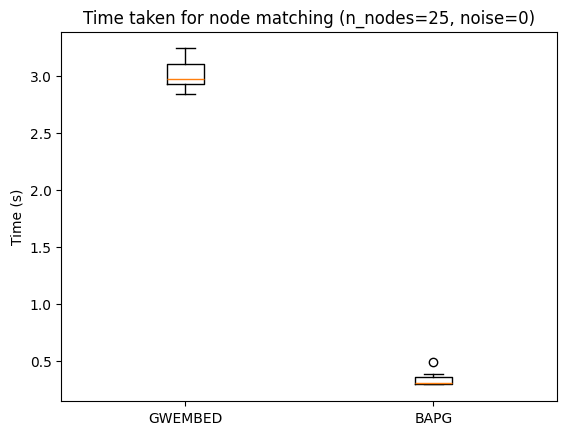

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


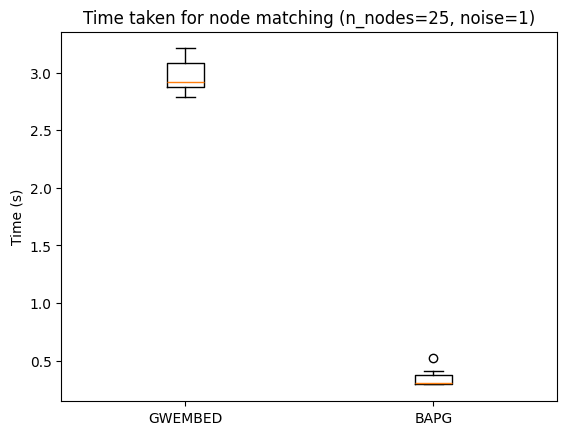

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


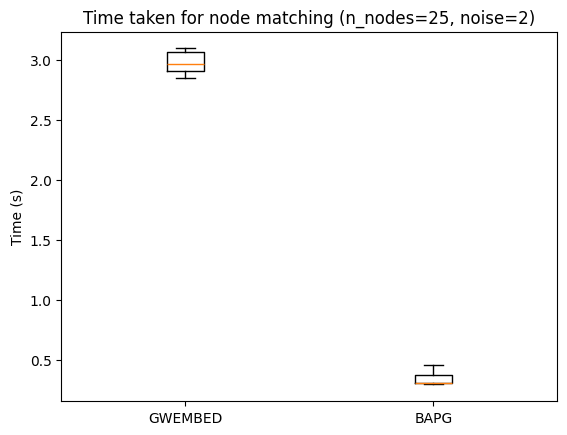

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


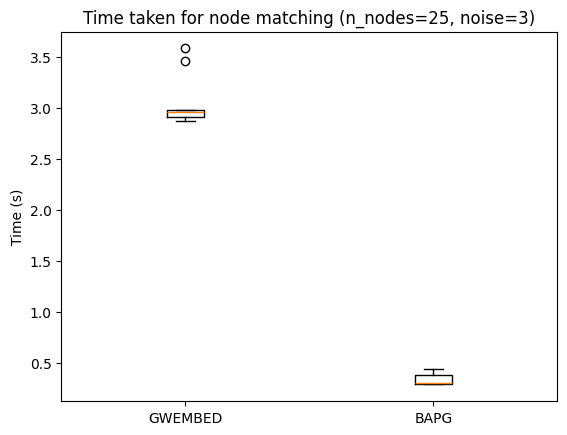

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


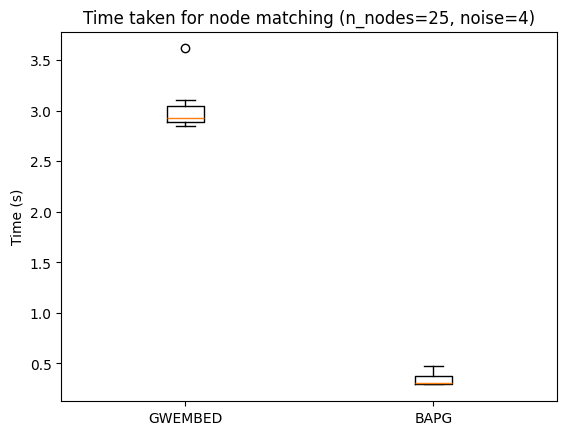

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


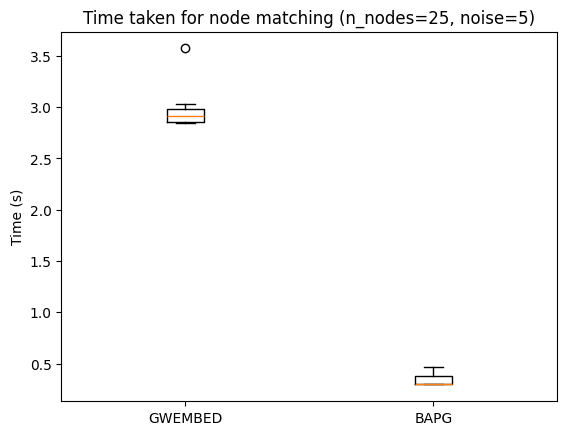

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


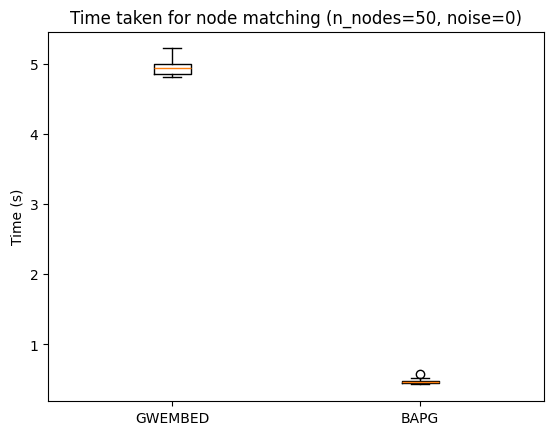

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


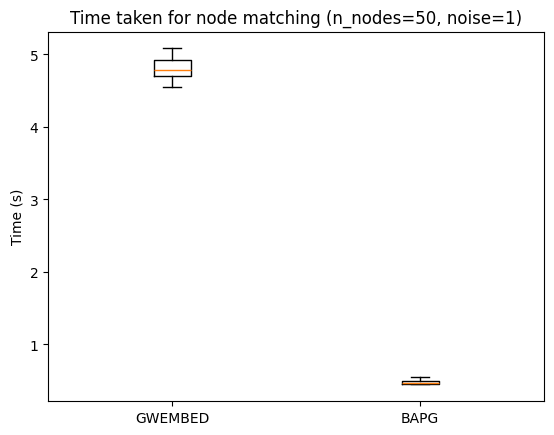

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


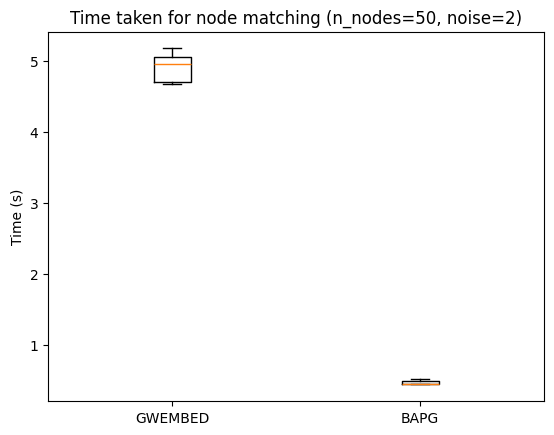

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


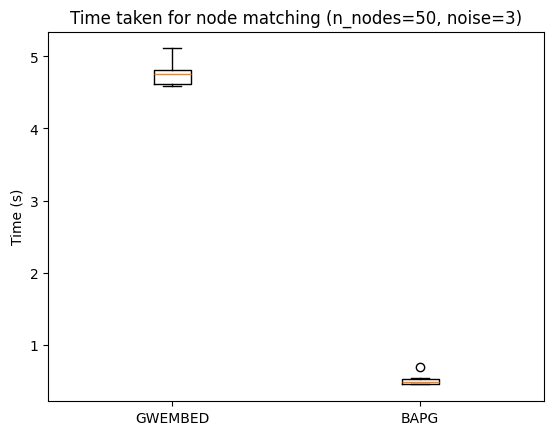

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


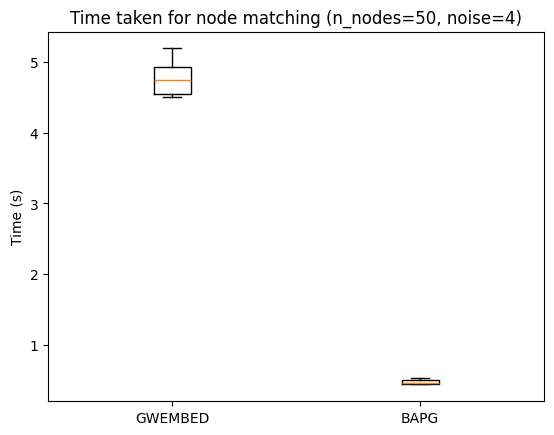

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


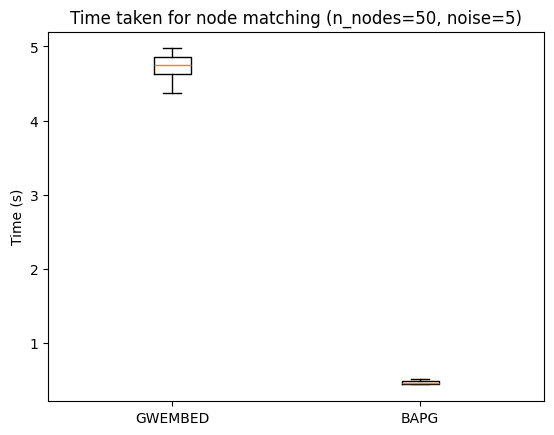

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


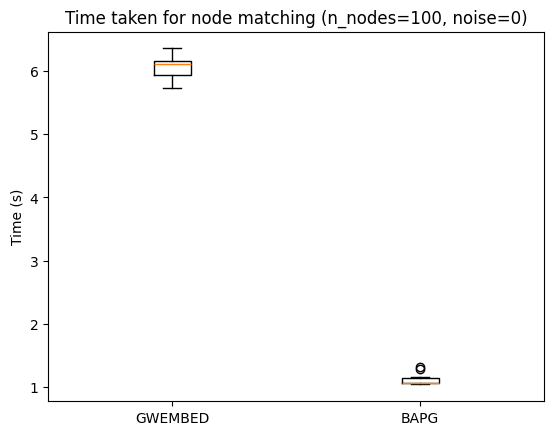

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


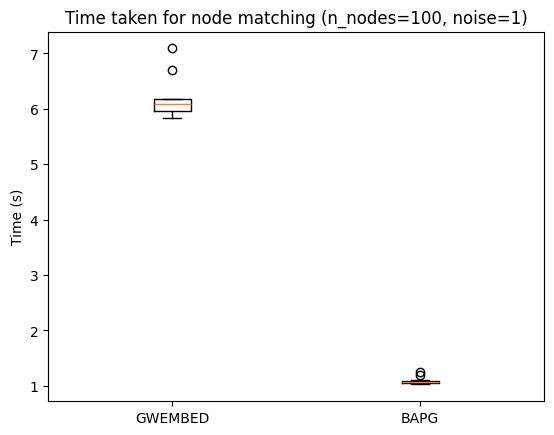

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


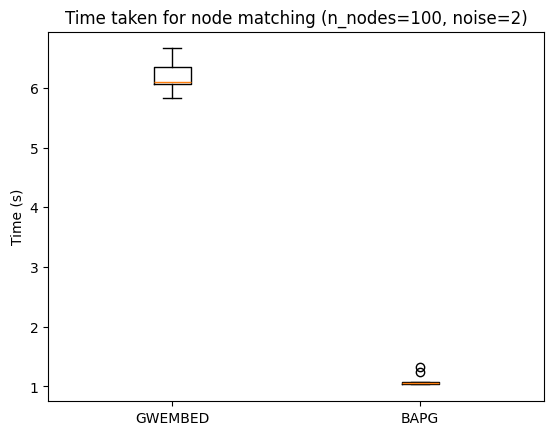

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


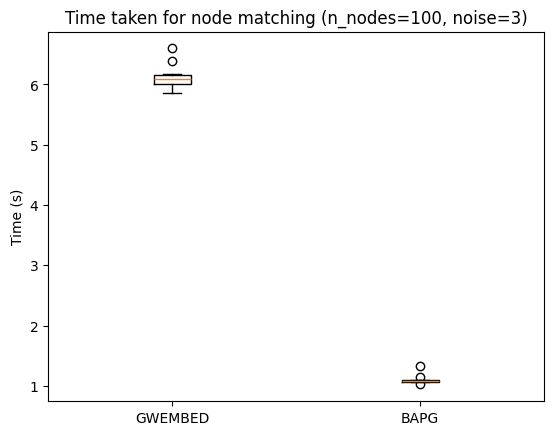

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


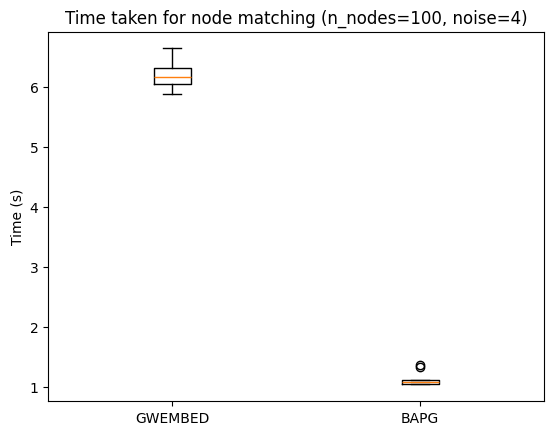

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


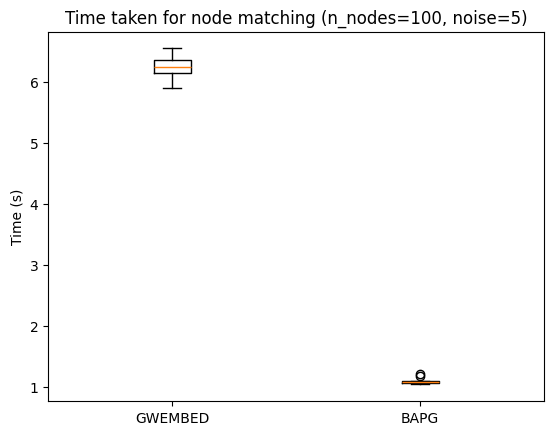

In [14]:
#  for each tuple in time_GWEMBED, plot the boxplot of the time taken by GWEMBED and BAPG
import matplotlib.pyplot as plt
for key in time_GWEMBED.keys():
    plt.figure()
    data = [time_GWEMBED[key], time_BAPG[key]]
    plt.boxplot(data, labels=['GWEMBED', 'BAPG'])
    plt.title('Time taken for node matching (n_nodes={}, noise={})'.format(key[0], key[1]))
    plt.ylabel('Time (s)')
    plt.show()

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


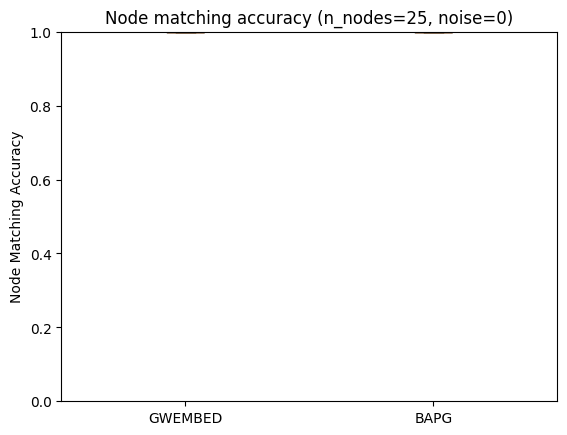

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


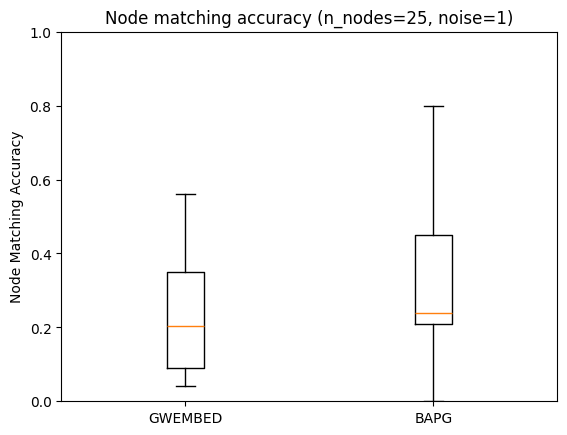

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


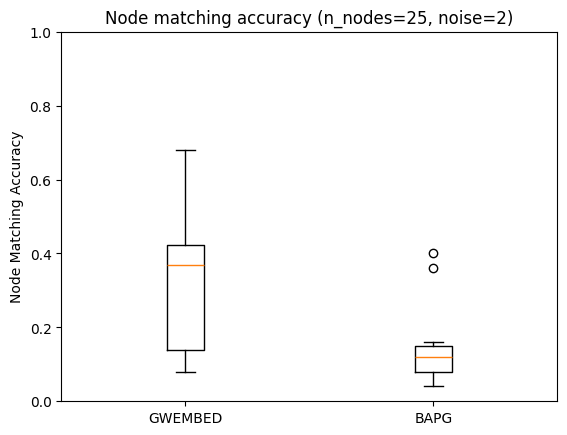

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


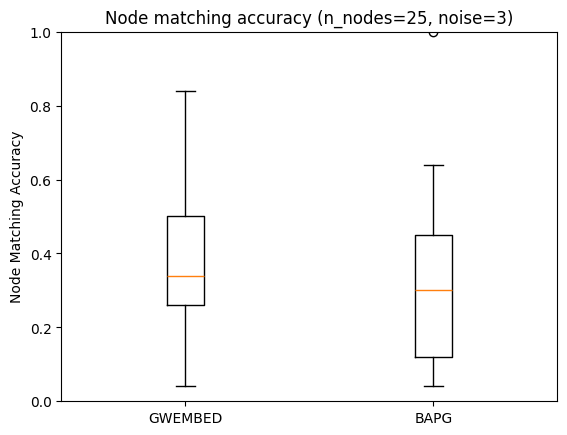

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


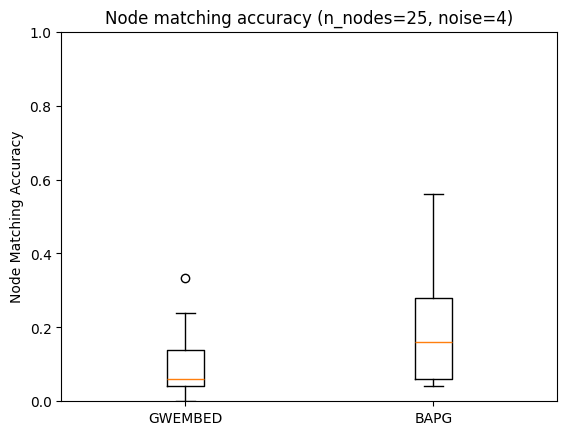

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


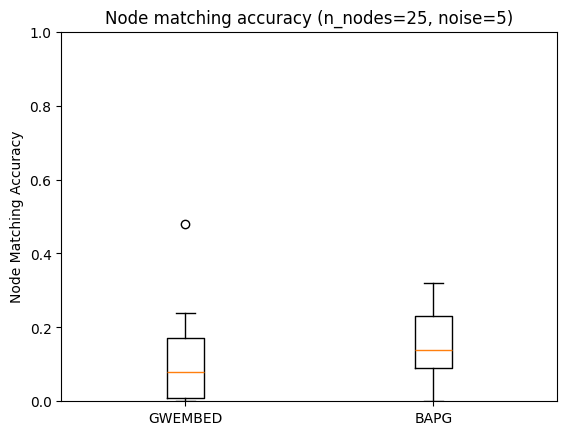

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


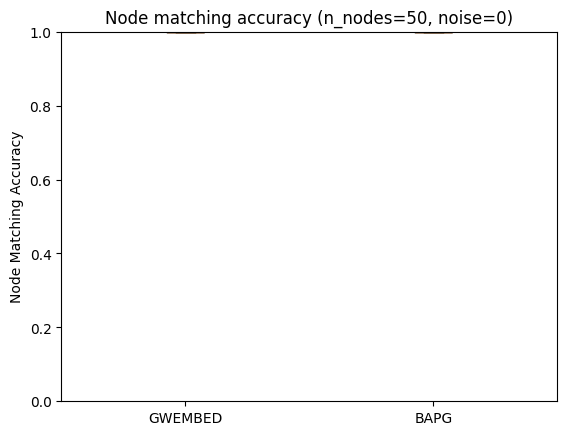

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


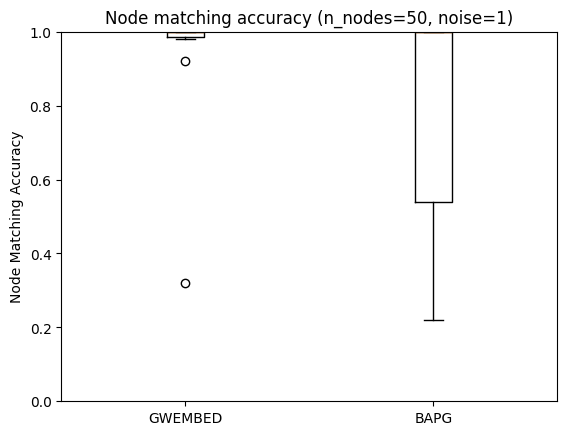

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


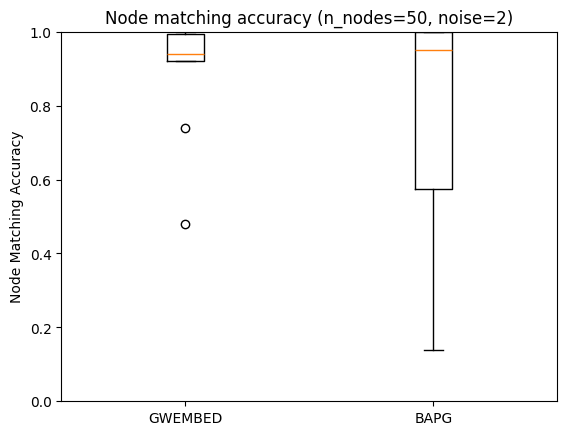

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


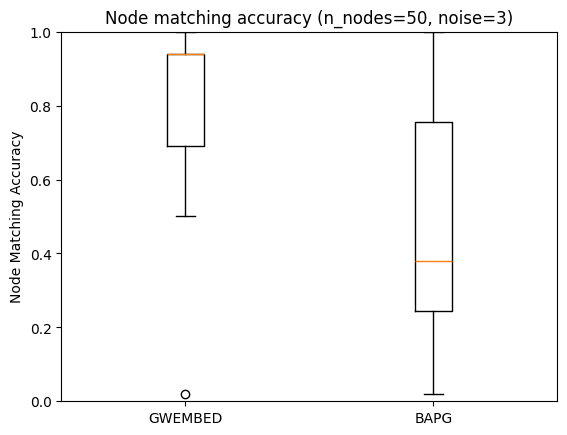

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


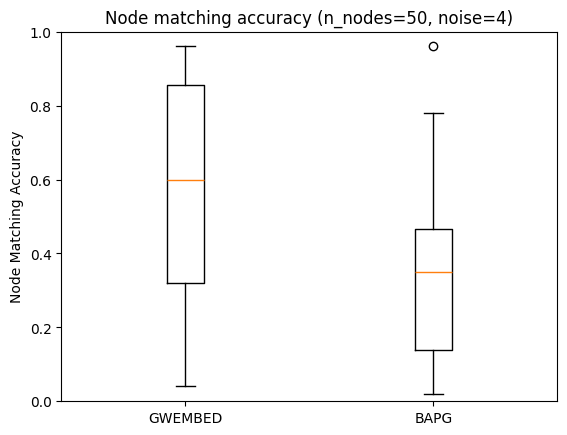

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


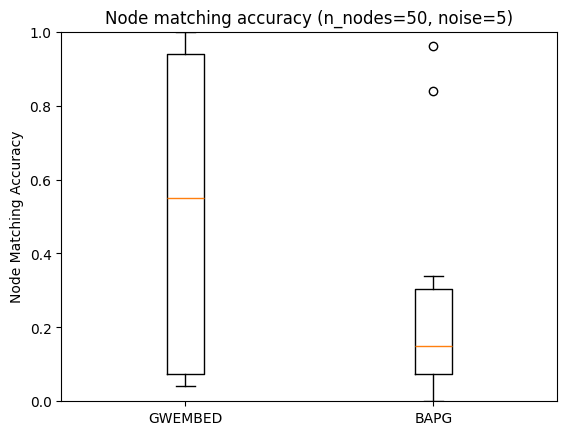

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


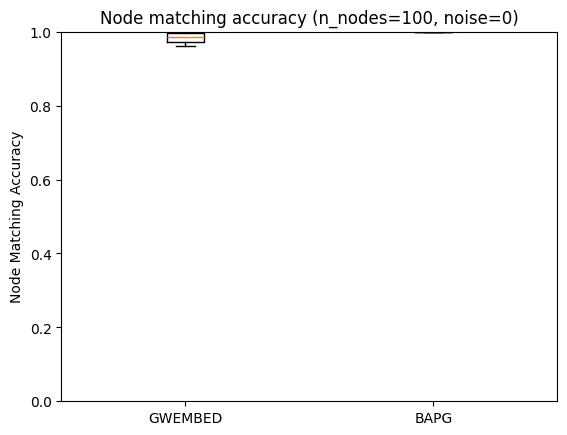

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


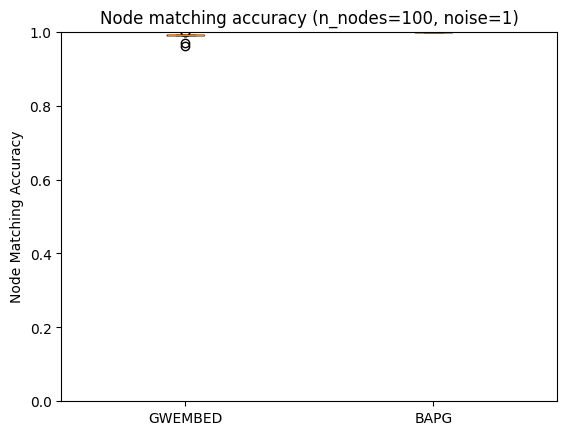

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


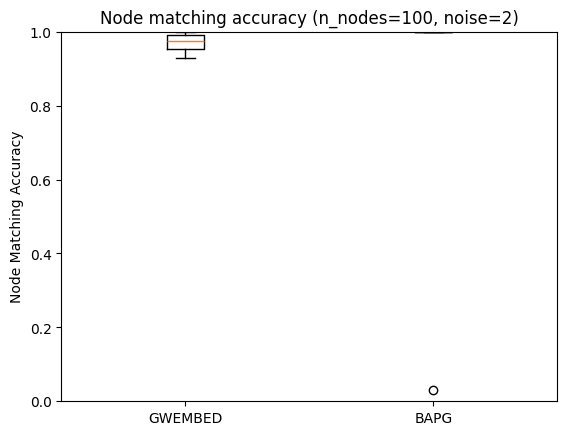

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


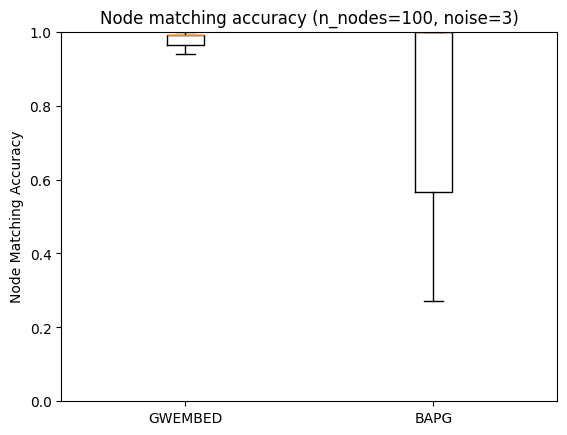

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


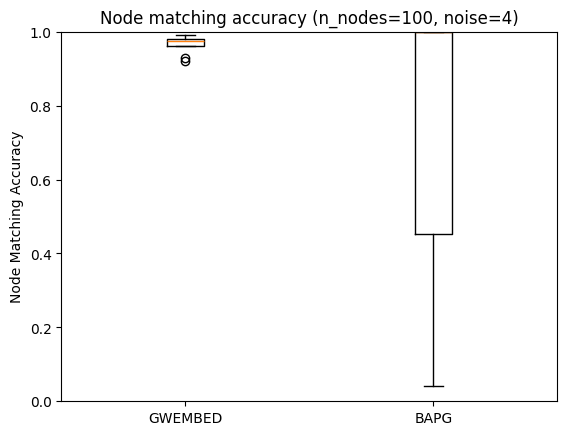

C:\Users\Dzu\AppData\Local\Temp\ipykernel_16956\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


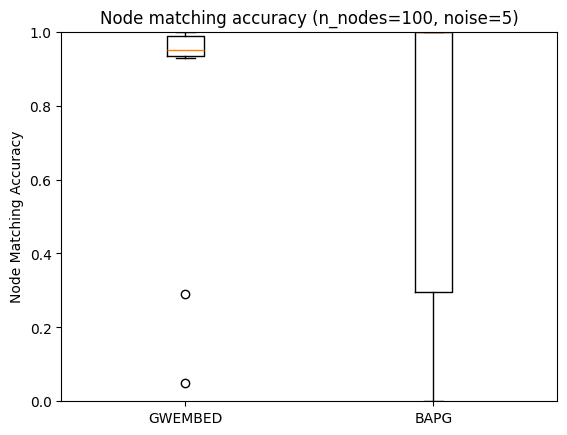

In [15]:
# for wach tuple in node_accuracy_GWEMBED, plot the boxplot of the node matching accuracy by GWEMBED and BAPG
import matplotlib.pyplot as plt

for key in node_accuracy_GWEMBED.keys():
    plt.figure()
    #extract the last value in each list in node_accuracy_GWEMBED[key]
    last_values_GWEMBED = [lst[-1] *0.01 for lst in node_accuracy_GWEMBED[key]]
    data = [last_values_GWEMBED, node_accuracy_BAPG[key]]
    plt.boxplot(data, labels=['GWEMBED', 'BAPG'])
    plt.title('Node matching accuracy (n_nodes={}, noise={})'.format(key[0], key[1]))
    plt.ylabel('Node Matching Accuracy')
    plt.ylim(0, 1)
    plt.show()

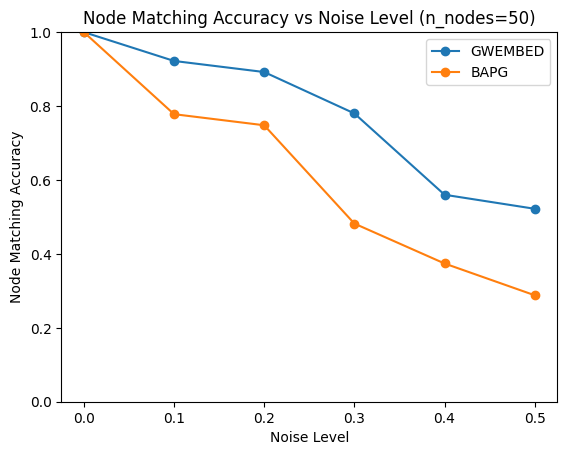

In [21]:
# take the node accuacy matching for n_nodes=50 and plot thedifferent noise levels on one with a 9% confidence interval line graph

import matplotlib.pyplot as plt

n_nodes = 50

noise_levels = []
accuracies_GWEMBED = []
accuracies_BAPG = []

for i in range(6):
    noise_levels.append(i * 0.1)
    key = (n_nodes, i)
    last_values_GWEMBED = [lst[-1] *0.01 for lst in node_accuracy_GWEMBED[key]]
    accuracies_GWEMBED.append(sum(last_values_GWEMBED) / len(last_values_GWEMBED))
    accuracies_BAPG.append(sum(node_accuracy_BAPG[key]) / len(node_accuracy_BAPG[key]))
plt.plot(noise_levels, accuracies_GWEMBED, label='GWEMBED', marker='o')
plt.plot(noise_levels, accuracies_BAPG, label='BAPG', marker='o')
plt.title('Node Matching Accuracy vs Noise Level (n_nodes={})'.format(n_nodes))
plt.xlabel('Noise Level')
plt.ylabel('Node Matching Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.show()


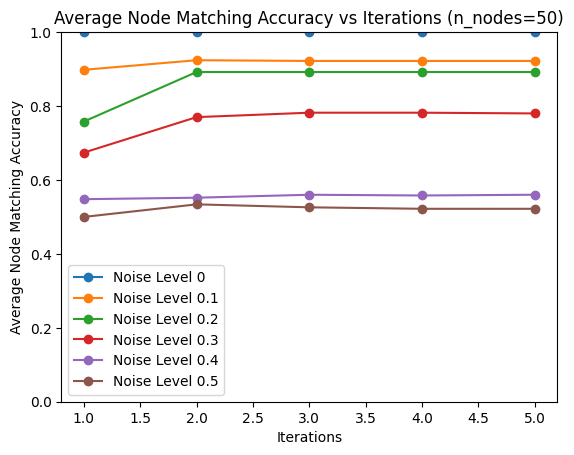

In [20]:
# plot average node accuracy for GWEMBED for the first 5 iterations of 50 node count and each noise level stacked on one plot
import matplotlib.pyplot as plt
n_nodes = 50
for i in [0, 0.1, 0.2, 0.3, 0.4, 0.5]:
    noise_level = i
    key = (n_nodes, i*10)
    avg_accuracies = []
    for iter in range(5):
        iter_accuracies = [lst[iter] *0.01 for lst in node_accuracy_GWEMBED[key]]
        avg_accuracy = sum(iter_accuracies) / len(iter_accuracies)
        avg_accuracies.append(avg_accuracy)
    plt.plot(range(1, 6), avg_accuracies, label='Noise Level {}'.format(noise_level), marker='o')


plt.title('Average Node Matching Accuracy vs Iterations (n_nodes=50)')
plt.xlabel('Iterations')
plt.ylabel('Average Node Matching Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.show()

In [18]:
node_accuracy_GWEMBED

{(25, 0): [[100.0, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0]],
 (25, 1): [[4.0, 8.0, 4.0, 4.0, 4.0],
  [4.0, 8.0, 8.0, 8.0, 8.0],
  [12.0, 16.0, 12.0, 16.0, 16.0],
  [20.0, 8.0, 8.0, 12.0, 12.0],
  [4.166666666666666, 8.333333333333332, 25.0, 25.0, 25.0],
  [40.0, 32.0, 32.0, 32.0, 32.0],
  [32.0, 36.0, 36.0, 36.0, 36.0],
  [24.0, 52.0, 56.00000000000001, 56.00000000000001, 56.00000000000001],
  [0.0, 8.0, 4.0, 4.0, 4.0],
  [50.0, 50.0, 50.0, 50.0, 50.0]],
 (25, 2): [[25.0, 37.5, 33.33333333333333, 37.5, 37.5],
  [36.0, 52.0, 44.0, 44.0, 44.0],
  [48.0, 52.0, 52.0, 52.0, 52.0],
  [20.0, 20.0, 20.0, 20.0, 20.0],
  [12.0, 8.0, 8.0, 8.0, 8.0],
  [56.00000000